In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
## To view data with full columns and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [311]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [312]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,2.0,NaN,New Property,1630.0,NaN,NaN,0,0,0,0,0,0,47
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,15.0,South-East,Relatively New,1800.0,NaN,1400.0,0,0,0,0,0,2,49
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,17.0,NaN,Under Construction,NaN,2129.0,NaN,0,1,0,0,0,0,44
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,1.0,North-East,Relatively New,1350.0,NaN,NaN,1,0,0,0,0,0,43
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,3.0,West,New Property,NaN,NaN,1300.0,0,0,0,0,0,0,87


In [313]:
df.shape

(3803, 23)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [315]:
## Check duplicate
df.duplicated().sum()

126

In [316]:
## drop duplicate rows
df.drop_duplicates(inplace=True)

## Univariate Analysis: One by one analyze individual column

## 1. property_type

<Axes: xlabel='property_type'>

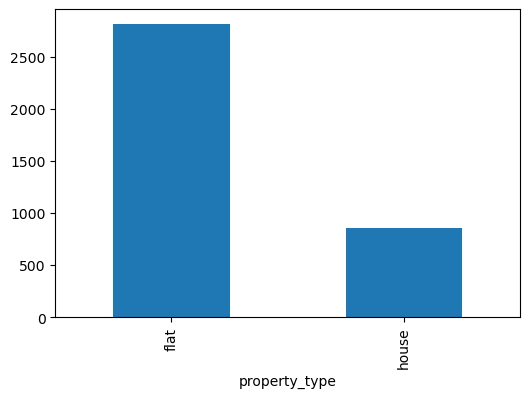

In [319]:
plt.figure(figsize=(6, 4))
df['property_type'].value_counts().plot(kind='bar')

In [320]:
df['property_type'].isnull().sum()

0

### Observations:
1. Flats are in majority(75 percent) and there are less number of houses(~25 percent)
2. No missing values

## 2. society

In [323]:
df['society'].value_counts()

society
independent                                          486
tulip violet                                          75
ss the leaf                                           73
shapoorji pallonji joyville gurugram                  42
dlf new town heights                                  42
signature global park                                 35
shree vardhman victoria                               34
emaar mgf emerald floors premier                      32
smart world orchard                                   32
dlf the ultima                                        31
paras dews                                            31
dlf regal gardens                                     30
m3m woodshire                                         30
shree vardhman flora                                  29
smart world gems                                      28
la vida by tata housing                               28
godrej nature plus                                    27
signature global solera

In [324]:
df['society'].value_counts().shape

(676,)

In [325]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
shree vardhman victoria                 0.094357
emaar mgf emerald floors premier        0.104389
smart world orchard                     0.114420
paras dews                              0.124138
dlf the ultima                          0.133856
m3m woodshire                           0.143260
dlf regal gardens                       0.152665
shree vardhman flora                    0.161755
la vida by tata housing                 0.170533
smart world gems                        0.179310
signature global solera                 0.187774
godrej nature plus                      0.196238
bptp terra                              0.204075
tata primanti                           0.211599
emaar gurgaon greens                    0.219122
experion the

In [326]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

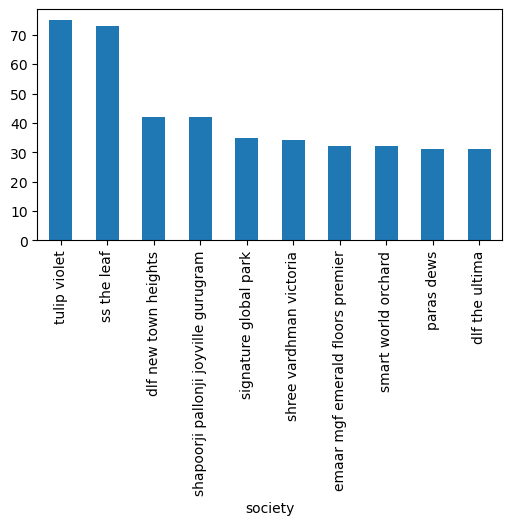

In [327]:
# top 10 socities as per property listings
plt.figure(figsize=(6, 3))
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [328]:
df['society'].isnull().sum()

1

In [329]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
789,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,0,0


### Observations
1. Around 13% properties comes under independent tag.
2. There are 675 societies.
3. The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies...
        Very High (>100): Only 1 society has more than 100 listings.
        High (50-100): 2 societies have between 50 to 100 listings.
        Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
        Low (2-9): 273 societies have between 2 to 9 listings.
        Very Low (1): A significant number, 308 societies, have only 1 listing.
4. 1 missing value

## 3. sector

In [332]:
# unique sectors
df['sector'].value_counts().shape

(103,)

<Axes: xlabel='sector'>

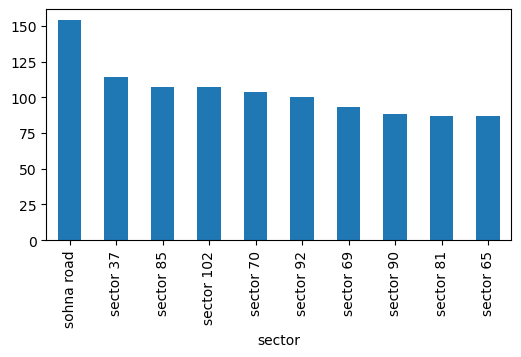

In [333]:
# top 10 sectors
plt.figure(figsize=(6, 3))
df['sector'].value_counts().head(10).plot(kind='bar')

In [334]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 5,
 'High (50-100)': 23,
 'Average (10-49)': 56,
 'Low (2-9)': 19,
 'Very Low (1)': 0}

### Observations

## 4. Price

In [337]:
# Price in cr.
df['price'].isnull().sum()

17

In [338]:
# Statistical summary of Price
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

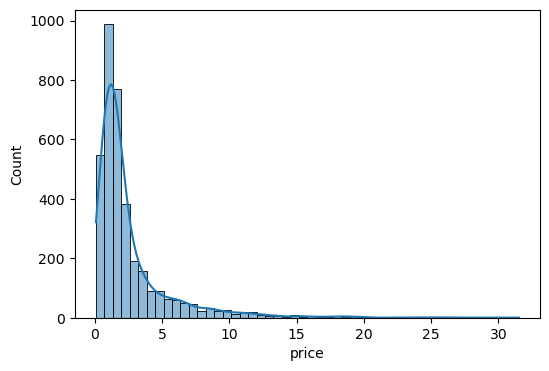

In [339]:
# DIstribution of Data
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True, bins=50)

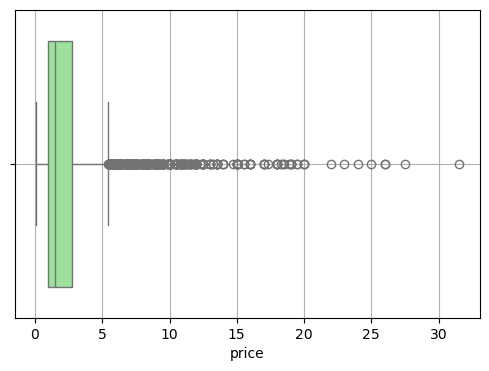

In [340]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

## Observations

1. Descriptive Statistics:
    - Count: There are 3781 non-missing price entries.
    - Mean Price: The average price is approximately 2.50 crores.
    - Median Price: The median (or 50th percentile) price is 1.5 crores.
    - Standard Deviation: The prices have a standard deviation of 2.95, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.94 crores to 2.70 crores.

2. Visualizations:
    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

3. Missing Values: There are 17 missing values in the price column.




In [343]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.279170473313461 14.933372629214254


4.Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

5.Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [345]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [346]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

print('IQR: ',IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

IQR:  1.8
-1.7500000000000002 5.45


In [347]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [348]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

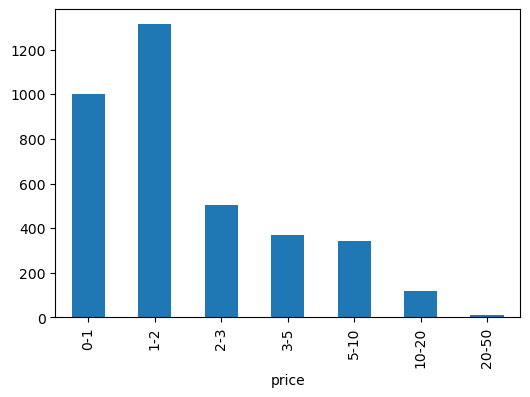

In [350]:
# price binning
plt.figure(figsize=(6,4))
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

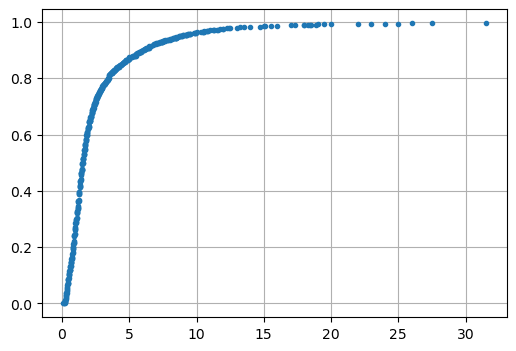

In [352]:
# ecdf plot
plt.figure(figsize=(6,4))
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

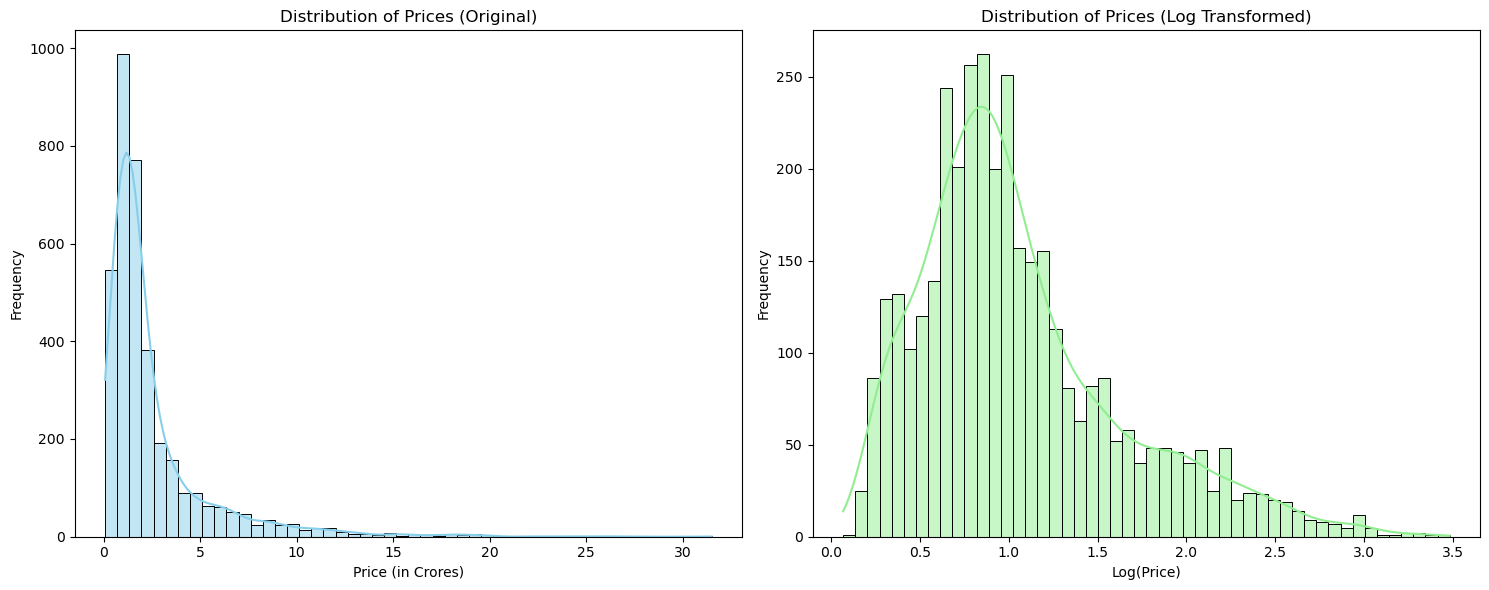

In [353]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [355]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255313 0.9646692415449265


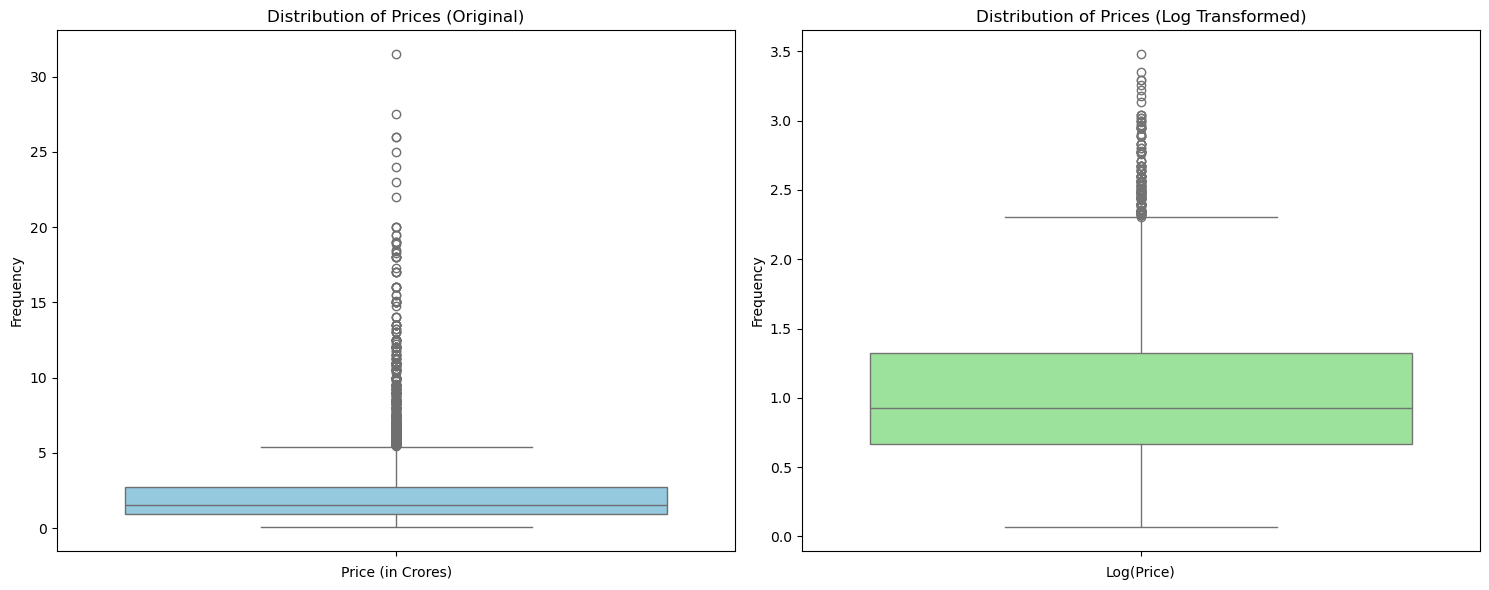

In [356]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

After applying log transformation on Price column,
- IQR is increased
- Number of outliers are reduced
- Distribution will become close to normal

## 5. price_per_sqft

In [359]:
df['price_per_sqft'].isnull().sum()

17

In [360]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

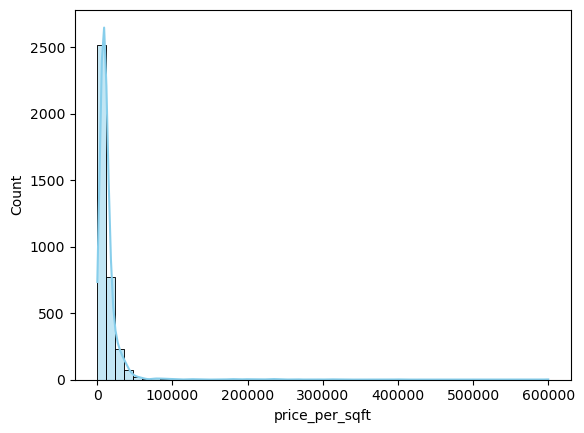

In [361]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

- Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000.
- There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_per_sqft'>

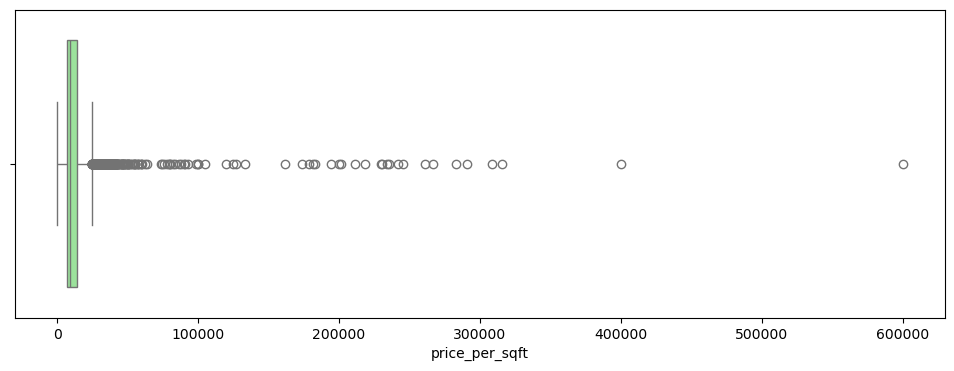

In [363]:
plt.figure(figsize=(12,4))
sns.boxplot(df['price_per_sqft'], color='lightgreen',orient='h')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

Observations
- Potential Outliers
- Right Skewed
- 18 missing values

## 6. bedRoom

In [366]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

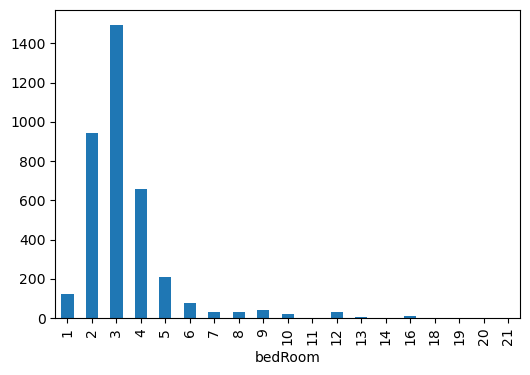

In [367]:
plt.figure(figsize=(6,4))
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

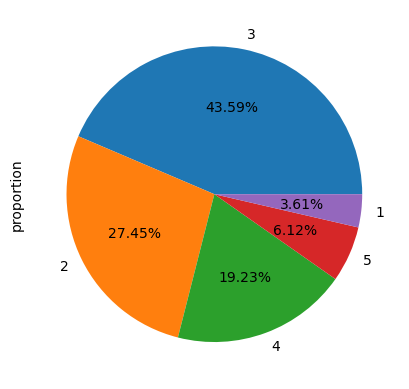

In [368]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## 7. bathroom

In [370]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

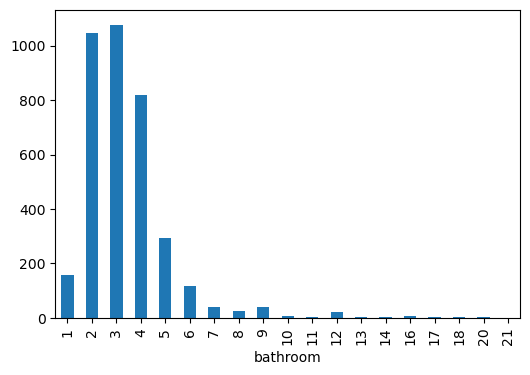

In [371]:
plt.figure(figsize=(6,4))
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

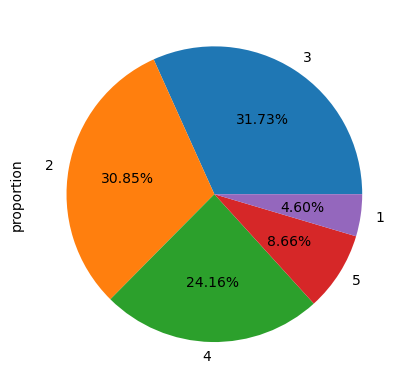

In [372]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [373]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,smart world orchard,sector 61,2.60,14723.0,1766.0,Super Built up area 1630(151.43 sq.m.),3,3,2,2.0,NaN,New Property,1630.0,NaN,NaN,0,0,0,0,0,0,47
1,flat,pioneer park,sector 61,2.10,11666.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,15.0,South-East,Relatively New,1800.0,NaN,1400.0,0,0,0,0,0,2,49
2,flat,godrej air,sector 85,2.60,12212.0,2129.0,Built Up area: 2129 (197.79 sq.m.),3,3,3,17.0,NaN,Under Construction,NaN,2129.0,NaN,0,1,0,0,0,0,44
3,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2,2,3,1.0,North-East,Relatively New,1350.0,NaN,NaN,1,0,0,0,0,0,43
4,flat,central park flower valley,sector 33,1.35,10384.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3,2,2,3.0,West,New Property,NaN,NaN,1300.0,0,0,0,0,0,0,87


## 8. balcony

In [375]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

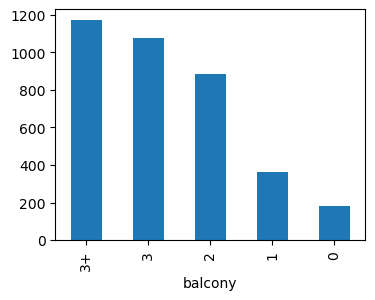

In [376]:
plt.figure(figsize=(4,3))
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

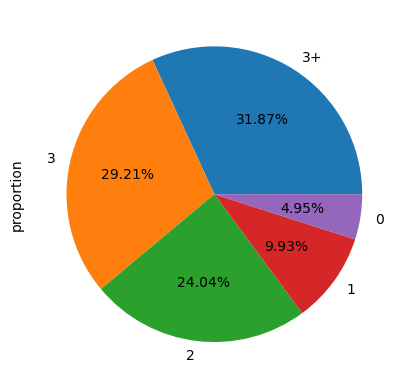

In [377]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## 9. floorNum

In [379]:
df['floorNum'].isnull().sum()

19

In [380]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

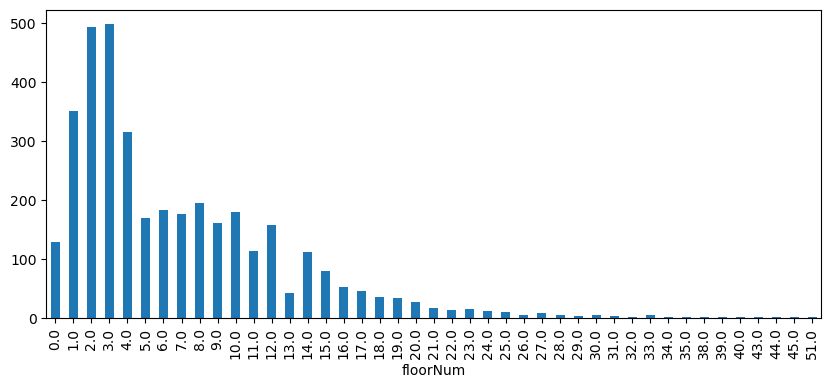

In [381]:
plt.figure(figsize=(10,4))
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

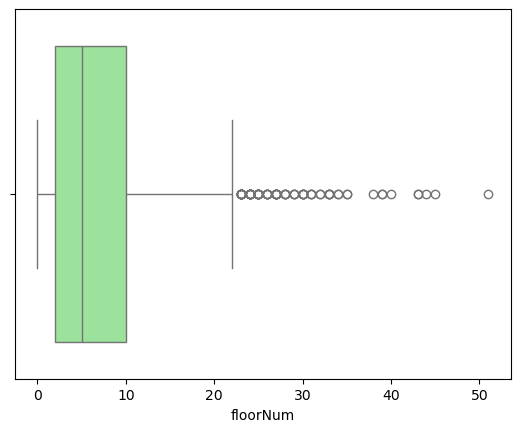

In [382]:
sns.boxplot(df['floorNum'], color='lightgreen',orient='h')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

## 10. facing

In [385]:
df['facing'].isnull().sum()

1045

In [386]:
df['facing'].fillna('NA',inplace=True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_16808\3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [387]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

## 11. agePossession

In [389]:
df['agePossession'].isnull().sum()

0

In [390]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

## 12. areas

### super built up area

In [393]:
df['super_built_up_area'].isnull().sum()

1802

In [394]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

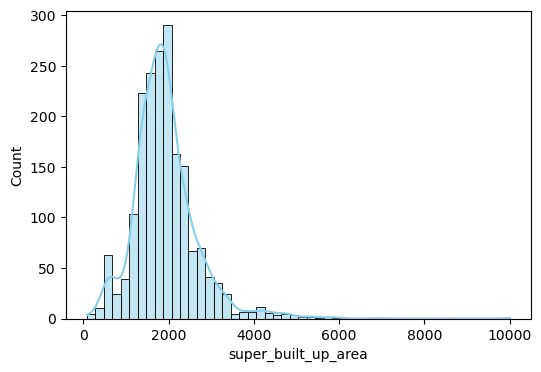

In [395]:
plt.figure(figsize=(6,4))
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

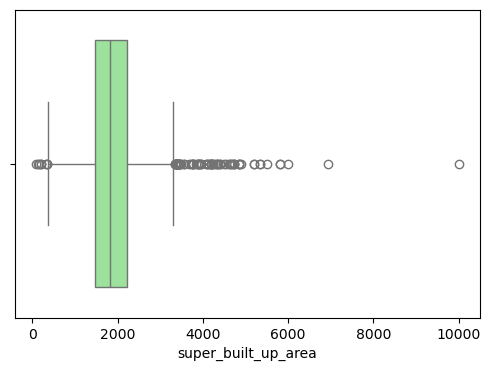

In [396]:
plt.figure(figsize=(6,4))
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen',orient='h')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

### built up area

In [399]:
df['built_up_area'].isnull().sum()

1987

In [400]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

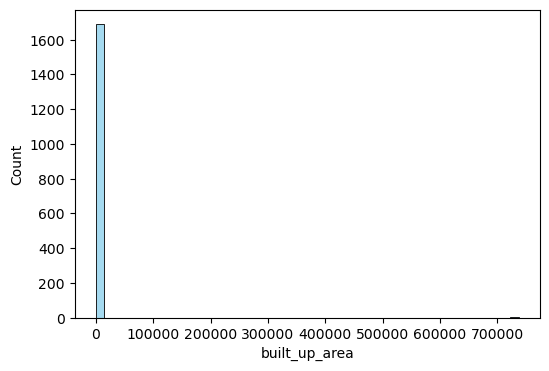

In [401]:
plt.figure(figsize=(6,4))
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

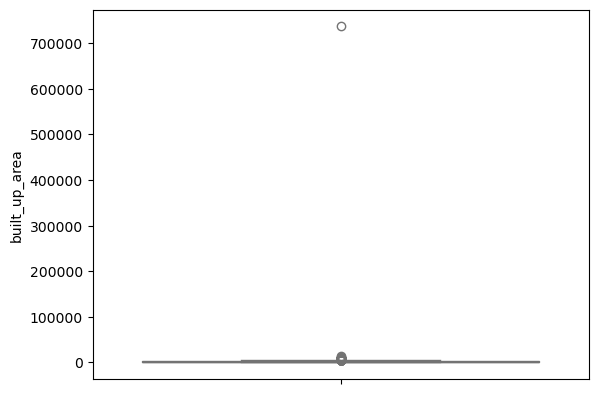

In [402]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

### carpet area

In [405]:
df['carpet_area'].isnull().sum()

1805

In [406]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

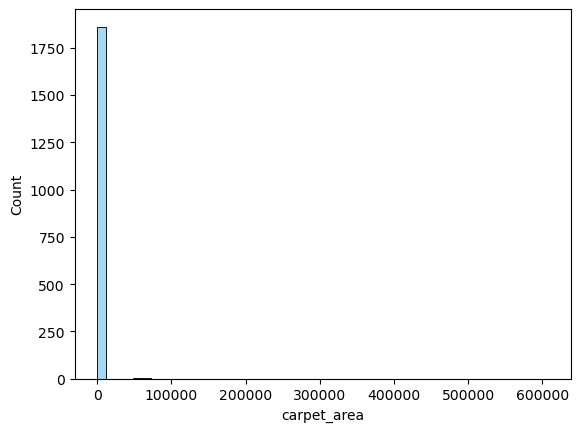

In [407]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

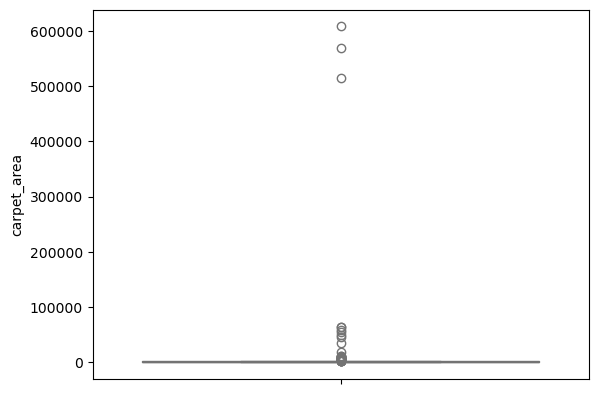

In [408]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

## 13. additional Rooms

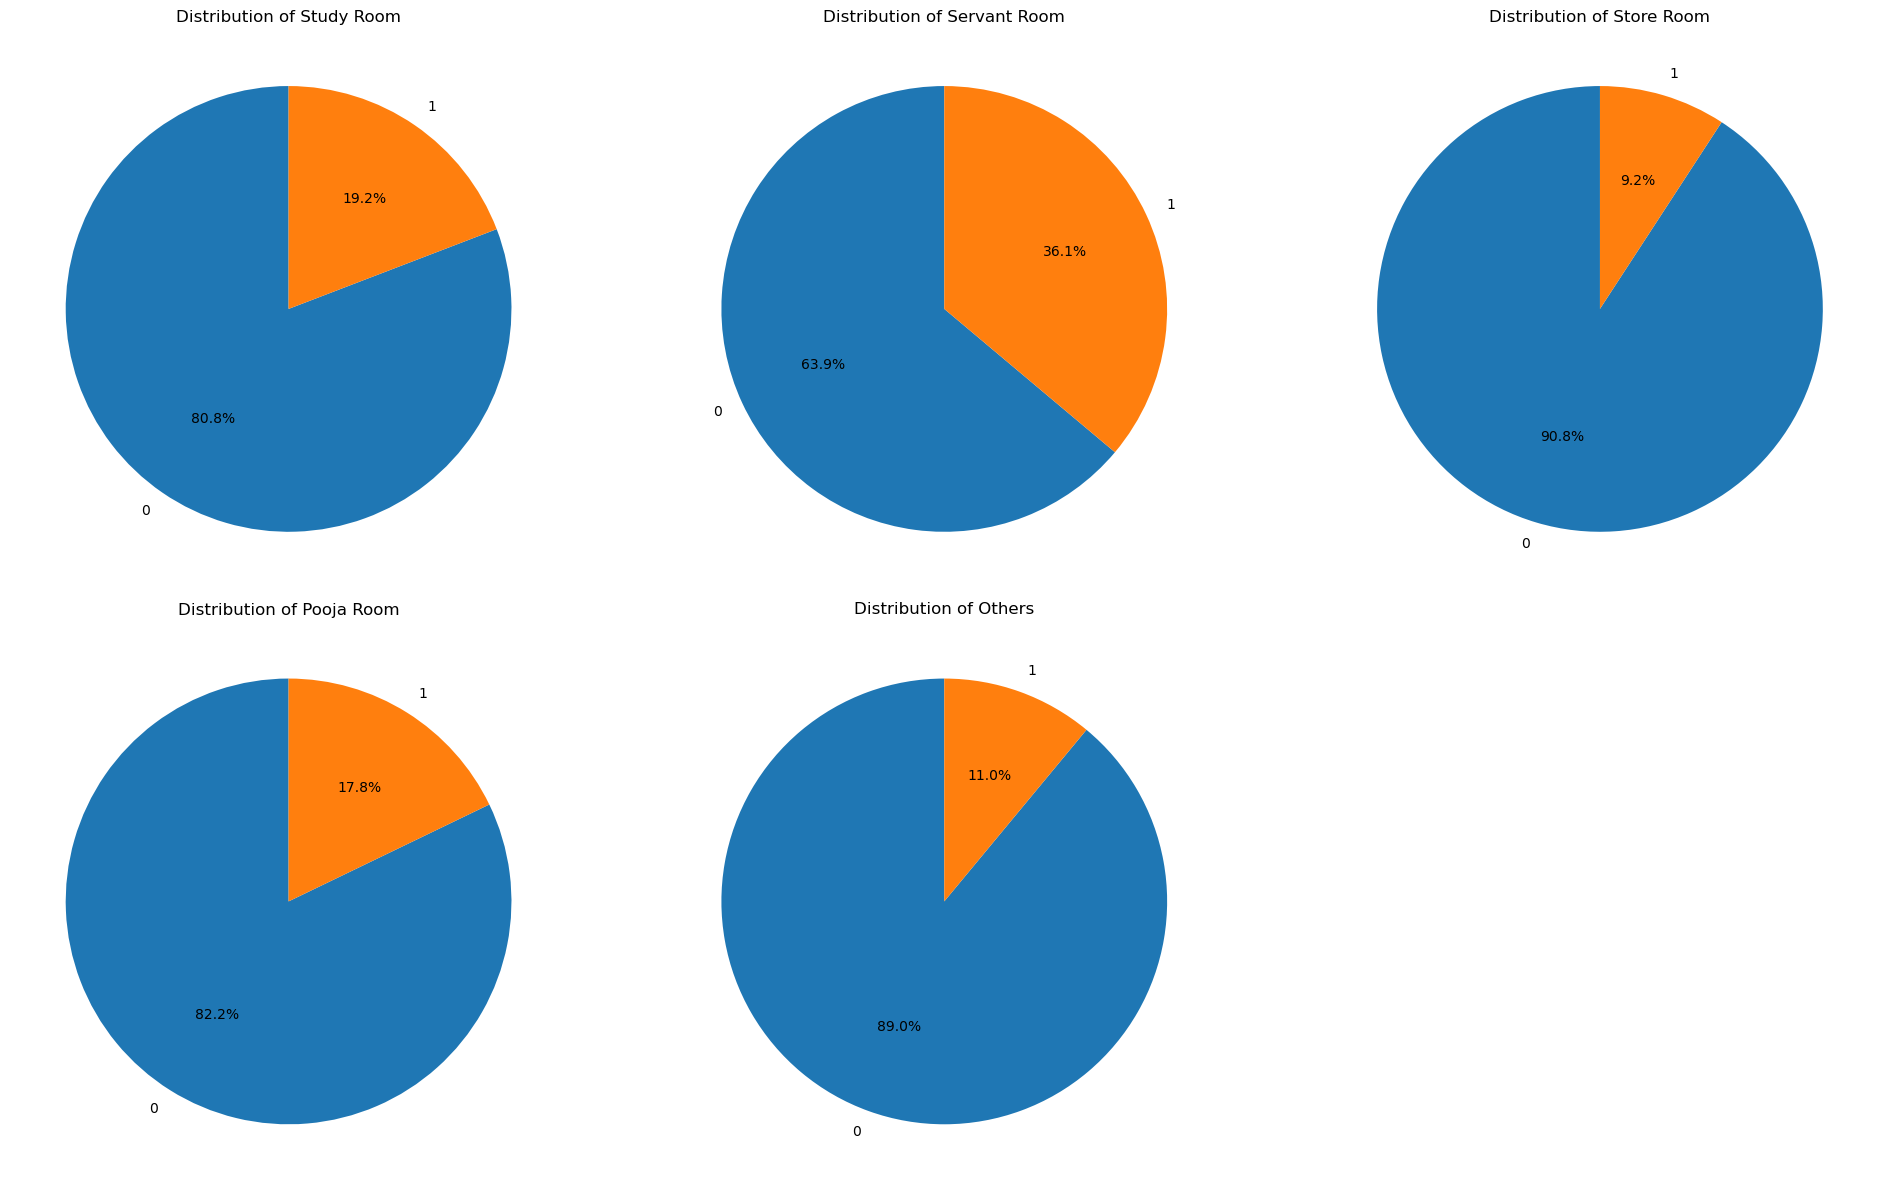

In [410]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## 14. furnishing_type

In [412]:
df['furnishing_type'].value_counts()

furnishing_type
0    2436
2    1038
1     203
Name: count, dtype: int64

<Axes: ylabel='count'>

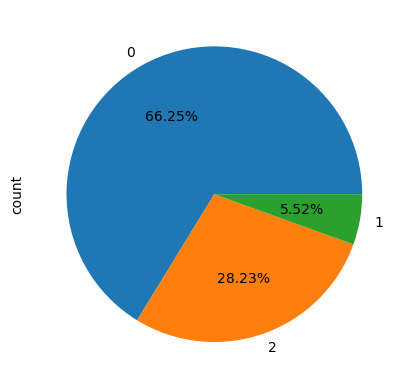

In [413]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

## 15. luxury score

In [415]:
df['luxury_score'].isnull().sum()

0

In [416]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

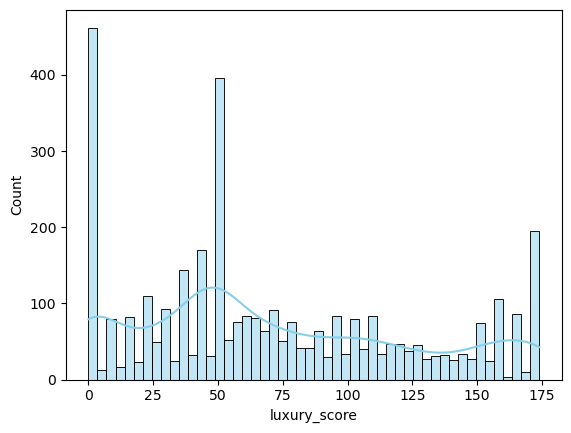

In [417]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

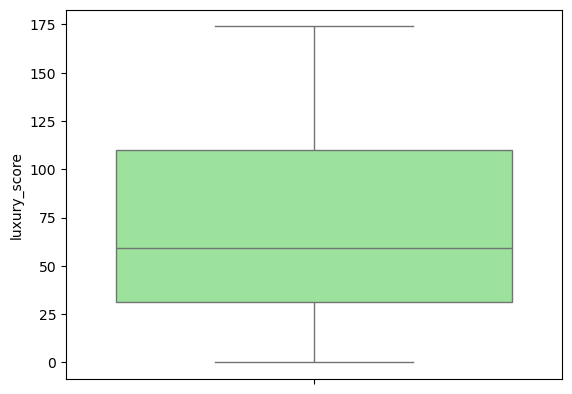

In [418]:
sns.boxplot(df['luxury_score'], color='lightgreen')


- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

- The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.